# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [52]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [30]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons): 
        if i==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [49]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [50]:
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [54]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr ,opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session()
    print('Experiment with LR = %.6f, Optimizer = %s'%(lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
             
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc  = model.history.history['acc']
    valid_acc  = model.history.history['val_acc']
    
    exp_name_tag = 'exp-lr-%s-optimizer-%s' %(str(lr), str(opti))
    results[exp_name_tag] = {'train_loss':train_loss,
                             'valid_loss':valid_loss,
                             'train_acc':train_acc,
                             'valid_acc':valid_acc}
    

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 14.4445 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 170us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_l

50000/50000 [==============================] - 7s 143us/step - loss: 14.4448 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 143us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 9s 171us/step - loss: 14.4447 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 170us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 7s 133us/step - loss: 2.0669 - acc: 0.2544 - val_loss: 1.9747 - val_acc: 0.2744
Epoch 2/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8871 - acc: 0.3329 - val_loss: 1.9326 - val_acc: 0.2984
Epoch 3/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.8135 - acc: 0.3614 - val_loss: 1.8535 - val_acc: 0.3399
Epoch 4/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7658 - acc: 0.3803 - val_loss: 1.7850 - val_acc: 0.3571
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.7260 - acc: 0.3938 - val_loss: 1.8088 - val_acc: 0.3450
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6965 - acc: 0.4014 - val_loss: 1.7013 - val_acc: 0.3984
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6667 - acc: 0.4135 - val_loss: 1.6625 - val_acc: 0.4126
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 9s 174us/step - loss: 14.4443 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 8s 168us/step - loss: 14.4453 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 160us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 11s 220us/step - loss: 14.4451 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 11s 217us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 12s 232us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 219us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 214us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 8s 158us/step - loss: 2.2700 - acc: 0.1537 - val_loss: 2.2216 - val_acc: 0.1992
Epoch 2/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.1928 - acc: 0.2157 - val_loss: 2.1610 - val_acc: 0.2400
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.1377 - acc: 0.2467 - val_loss: 2.1125 - val_acc: 0.2630
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.0933 - acc: 0.2662 - val_loss: 2.0729 - val_acc: 0.2816
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.0548 - acc: 0.2823 - val_loss: 2.0373 - val_acc: 0.2943
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.0219 - acc: 0.2930 - val_loss: 2.0083 - val_acc: 0.3041
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.9949 - acc: 0.3020 - val_loss: 1.9838 - val_acc: 0.3141
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.8881 - acc: 0.3159 - val_loss: 1.9853 - val_acc: 0.2909
Epoch 3/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.7858 - acc: 0.3567 - val_loss: 1.7753 - val_acc: 0.3366
Epoch 4/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7100 - acc: 0.3877 - val_loss: 1.7804 - val_acc: 0.3636
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6545 - acc: 0.4066 - val_loss: 1.6145 - val_acc: 0.4225
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6167 - acc: 0.4236 - val_loss: 1.7759 - val_acc: 0.3674
Epoch 7/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5777 - acc: 0.4390 - val_loss: 1.9165 - val_acc: 0.3537
Epoch 8/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5404 - acc: 0.4498 - val_loss: 1.6436 - val_acc: 0.4081
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.7438 - acc: 0.3861 - val_loss: 1.7817 - val_acc: 0.3621
Epoch 4/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6941 - acc: 0.4067 - val_loss: 1.7046 - val_acc: 0.3939
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6552 - acc: 0.4202 - val_loss: 1.6771 - val_acc: 0.4064
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6253 - acc: 0.4324 - val_loss: 1.6466 - val_acc: 0.4125
Epoch 7/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6014 - acc: 0.4399 - val_loss: 1.6221 - val_acc: 0.4238
Epoch 8/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.5795 - acc: 0.4485 - val_loss: 1.6008 - val_acc: 0.4294
Epoch 9/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.5598 - acc: 0.4545 - val_loss: 1.6076 - val_acc: 0.4347
Epoch 10/50
50000/50000 [=========

Epoch 4/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.5519 - acc: 0.4472 - val_loss: 1.5379 - val_acc: 0.4524
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5093 - acc: 0.4625 - val_loss: 1.5662 - val_acc: 0.4411
Epoch 6/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4642 - acc: 0.4786 - val_loss: 1.5076 - val_acc: 0.4711
Epoch 7/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.4372 - acc: 0.4879 - val_loss: 1.4661 - val_acc: 0.4771
Epoch 8/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4155 - acc: 0.4993 - val_loss: 1.4429 - val_acc: 0.4883
Epoch 9/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.3824 - acc: 0.5082 - val_loss: 1.4239 - val_acc: 0.4983
Epoch 10/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.3569 - acc: 0.5167 - val_loss: 1.4288 - val_acc: 0.4970
Epoch 11/50
50000/50000 [=

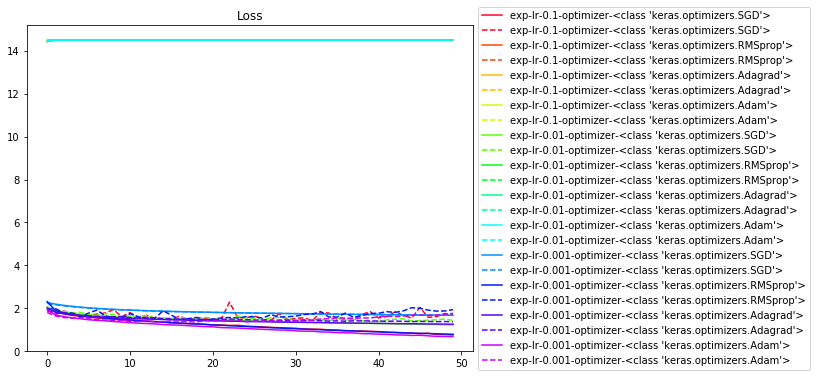

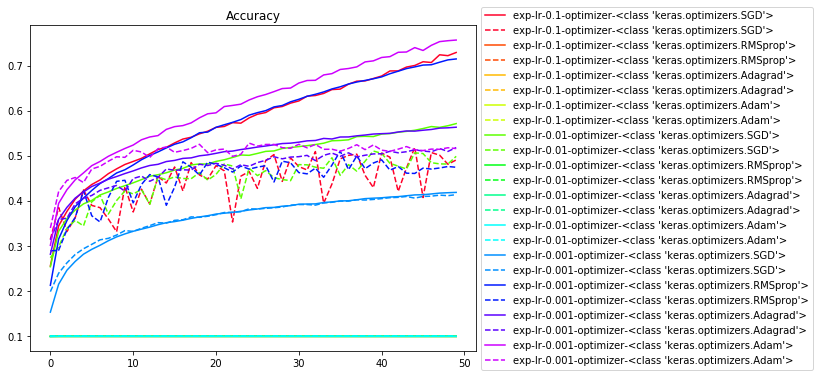

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLOR = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLOR) for i in range(NUM_COLOR)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',label=cond,color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'],'--',label=cond,color=color_bar[i])
plt.title('Loss') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',label=cond,color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'],'--',label=cond,color=color_bar[i])
plt.title('Accuracy') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    
    